<b>

<p>
<center>
<font size="5">
Yelp Data Exploration - Capstone Project - DATS 6501 - 10
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science Capstone
    <br>
Author: Pradip Hayu & Gaberial Campese
</font>
</center>
</p>

</b>

# 1 INTRODUCTION

Yelp is a social networking site/app, centered on customer reviews of local businesses. Anyone can post a review on Yelp, and anyone searching the web can use Yelp to find and evaluate local businesses. With more and more people being introduced to this app, it also provides Yelp a huge amount of market information, which could be used for local businesses to improve their performance based on ratings and reviews and local government to identify the most thriving business type in town. It is highly likely that this is one of the reasons that Yelp host this big data challenge for the public to analyze from different perspectives.

Problem Statement 

Opening a business is extremely susceptible to risk as that is what comes with being an entrepreneur. Whether it be a restaurant or shopping center, important aspects such as location, demographics, and expectations must be evaluated to determine where and what makes a successful business. More specifically, initial decisions can have everlasting effects because they put performance and investment at stake.

Issue: Opening a business is extremely susceptible to risk as that is what comes with being an entrepreneur. 

“So what?”- Performance and investment at stake. Performance and investment can be optimized by carefully evaluating Yelp data to provide insight on what makes a successful business. 

Link to the Data:
https://www.yelp.com/dataset/challenge

https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6

# 2 DATA PREPROCESSING

## 2.1 Supress unnecessary warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 2.2 Import jason/pandas/numpy

In [2]:
import json
import numpy as np
import pandas as pd

## 2.3 Data Cleaning

### 2.3.1 Business Data

In [3]:
#Load and preview the business data
business = []
with open('business.json') as f:
    for line in f:
        business.append(json.loads(line))
business1 = pd.DataFrame.from_dict(business)
business1.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [4]:
business1.shape
#14 variables, 192609 entries

(192609, 14)

In [5]:
business1.info()
#There are no Null values in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
#Let's look closely at the states column
business1.state.unique()

array(['AZ', 'ON', 'NC', 'AB', 'NV', 'OH', 'PA', 'QC', 'WI', 'IL', 'NY',
       'SC', 'TX', 'UT', 'NM', 'FL', 'CA', 'VA', 'BAS', 'NE', 'AK', 'XGM',
       'WA', 'XWY', 'CON', 'BC', 'GA', 'VT', 'CT', 'AL', 'DUR', 'TN',
       'NJ', 'AR', 'XGL', 'DOW'], dtype=object)

Some of the states does not look like they belong to the US, so we will filter out the restaurants which are in the US.

In [7]:
#Filtering out the restaurants which are in the United States
US_States = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS",
             "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC",
             "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

USA = business1.loc[business1['state'].isin(US_States)]
USA

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
12,"119 Landings Dr, Ste 101","{'BusinessParking': '{'garage': False, 'street...",5t3KVdMnFgAYmSl1wYLhmA,"Bars, Nightlife, Pubs, Barbers, Beauty & Spas,...",Mooresville,"{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ...",1,35.527410,-80.868003,The Kilted Buffalo Langtree,28117,9,3.5,NC
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH


In [8]:
USA.state.unique()
#Looks Good Now

array(['AZ', 'NC', 'NV', 'OH', 'PA', 'WI', 'IL', 'NY', 'SC', 'TX', 'UT',
       'NM', 'FL', 'CA', 'VA', 'NE', 'AK', 'WA', 'GA', 'VT', 'CT', 'AL',
       'TN', 'NJ', 'AR'], dtype=object)

For this project,we are focussing on restaurants, so we will filter out just restaurants from all the businesses

In [9]:
USA_restaurants = USA[USA['categories'].str.contains('Restaurants', na = False)]
USA_restaurants

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
23,"Center Core - Food Court, Fl 3, Pittsburgh Int...","{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,None,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA
25,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
35,6401 Morrison Blvd,"{'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...",BvYU3jvGd0TJ7IyZdfiN2Q,"Sandwiches, Italian, American (Traditional), A...",Charlotte,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC
58,6432 E Independence Blvd,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...",_J_x_RaYTqAqAuCwgRhnRQ,"Coffee & Tea, Hookah Bars, Nightlife, Persian/...",Charlotte,"{'Tuesday': '17:30-0:0', 'Wednesday': '17:30-0...",0,35.172028,-80.746801,Kabob House,28212,15,3.0,NC
66,4606 Penn Ave,"{'CoatCheck': 'False', 'BusinessParking': '{'g...",dQj5DLZjeDK3KFysh1SYOQ,"Nightlife, Bars, Polish, Modern European, Rest...",Pittsburgh,"{'Wednesday': '17:0-0:0', 'Thursday': '17:0-0:...",1,40.465694,-79.949324,Apteka,15224,242,4.5,PA
73,436 Market St,"{'OutdoorSeating': 'False', 'HasTV': 'True', '...",v-scZMU6jhnmV955RSzGJw,"Japanese, Sushi Bars, Restaurants",Pittsburgh,"{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",1,40.441062,-80.002126,No. 1 Sushi Sushi,15222,106,4.5,PA


In [10]:
USA_restaurants.shape
#By selecting just restaurants, the size of the data got reduced to about 1/3rd

(35878, 14)

In [11]:
#Checking to make sure there are no duplicated business id
USA_restaurants.business_id.duplicated().sum()

0

In [12]:
#Checking for any missing values
USA_restaurants.isna().sum()

address            0
attributes      1040
business_id        0
categories         0
city               0
hours           8095
is_open            0
latitude           0
longitude          0
name               0
postal_code        0
review_count       0
stars              0
state              0
dtype: int64

In [13]:
#Since we are focussing on predicting restaurant stars based on the attributes, we will create a new dataframe with
#just the attributes and stars columns
USA_restaurants_df = USA_restaurants.filter(['attributes','stars'], axis = 1)
USA_restaurants_df.head()

,attributes,stars
2,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",4.0
11,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",3.0
13,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",4.0
17,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",4.0
23,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",4.0


In [14]:
#Splitting attributes column
USA_restaurants_df = USA_restaurants_df.join(pd.DataFrame(USA_restaurants_df['attributes'].to_dict()).T)
pd.set_option('display.max_columns', 100)
#We can not view all the columns, so let's expand it to see all the columns to get a better idea on attributes
USA_restaurants_df

,attributes,stars,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
2,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",4.0,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,u'average',NaN,False,'casual',NaN,False,True,2,True,True,True,NaN,NaN,u'no'
11,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",3.0,NaN,NaN,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,False,NaN,NaN,NaN,False,u'casual',NaN,False,True,1,False,NaN,True,NaN,NaN,u'no'
13,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",4.0,NaN,NaN,u'none',None,NaN,NaN,NaN,True,NaN,True,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,u'casual',NaN,True,True,2,False,NaN,True,NaN,NaN,NaN
17,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",4.0,NaN,NaN,u'full_bar',"{'romantic': True, 'intimate': False, 'tourist...",NaN,'no',NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,False,NaN,u'quiet',NaN,False,'casual',NaN,False,True,2,True,NaN,True,NaN,NaN,u'no'
23,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",4.0,NaN,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,False,True,1,False,NaN,True,NaN,NaN,NaN
25,"{'BikeParking': 'True', 'BusinessParking': '{'...",4.5,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,False,True,NaN,'average',NaN,False,u'casual',NaN,False,True,1,False,NaN,True,NaN,NaN,u'no'
35,"{'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...",3.5,NaN,NaN,u'full_bar',NaN,NaN,NaN,NaN,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,u'casual',NaN,False,True,2,True,NaN,True,NaN,NaN,NaN
58,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...",3.0,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,True,u'casual',NaN,False,True,2,True,NaN,True,NaN,NaN,u'free'
66,"{'CoatCheck': 'False', 'BusinessParking': '{'g...",4.5,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,"{'monday': False, 'tuesday': False, 'friday': ...",True,False,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,False,NaN,NaN,NaN,NaN,False,False,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,False,"{'dj': False, 'background_music': True, 'jukeb...",u'average',NaN,False,u'casual',NaN,False,True,2,False,False,True,u'no',True,u'free'
73,"{'OutdoorSeating': 'False', 'HasTV': 'True', '...",4.5,NaN,NaN,'none',"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': True, 'validated':...",Na

In [15]:
#Renaming 'RestaurantsPriceRange2' column to 'RestaurantsPriceRange'
USA_restaurants_df.rename(columns={'RestaurantsPriceRange2':'RestaurantsPriceRange'}, inplace = True)

In [16]:
#Dropping the "attributes" column and some columns 'AcceptsInsurance', 'HairSpecializesIn' which are not related 
#to restaurant businesses
USA_restaurants_df.drop(['attributes','AcceptsInsurance', 'HairSpecializesIn'], axis = 1, inplace = True)

In [17]:
#Checking the NaNs for each column
USA_restaurants_df.isna().sum()

stars                             0
AgesAllowed                   35853
Alcohol                        7476
Ambience                       7787
BYOB                          35850
BYOBCorkage                   34459
BestNights                    33767
BikeParking                   11277
BusinessAcceptsBitcoin        32510
BusinessAcceptsCreditCards     2203
BusinessParking                5558
ByAppointmentOnly             35373
Caters                        12717
CoatCheck                     34012
Corkage                       35216
DietaryRestrictions           35847
DogsAllowed                   33278
DriveThru                     33466
GoodForDancing                33350
GoodForKids                    4425
GoodForMeal                   16742
HappyHour                     33113
HasTV                          7841
Music                         33046
NoiseLevel                    10282
Open24Hours                   35871
OutdoorSeating                 5488
RestaurantsAttire           

In [18]:
#Length of the dataframe
len(USA_restaurants_df)

35878

In [19]:
#Gettting the percentage of NaNs in the dataframe as that will help us to remove columns with excessive NaNs
USA_restaurants_df.isna().sum()/len(USA_restaurants_df) * 100

stars                          0.000000
AgesAllowed                   99.930319
Alcohol                       20.837282
Ambience                      21.704108
BYOB                          99.921958
BYOBCorkage                   96.044930
BestNights                    94.116171
BikeParking                   31.431518
BusinessAcceptsBitcoin        90.612632
BusinessAcceptsCreditCards     6.140253
BusinessParking               15.491387
ByAppointmentOnly             98.592452
Caters                        35.445120
CoatCheck                     94.799041
Corkage                       98.154858
DietaryRestrictions           99.913596
DogsAllowed                   92.753219
DriveThru                     93.277217
GoodForDancing                92.953899
GoodForKids                   12.333463
GoodForMeal                   46.663694
HappyHour                     92.293327
HasTV                         21.854618
Music                         92.106583
NoiseLevel                    28.658231


We will now set a threshold. If the NaNs are more than 70%, we will delete those columns. If it is less than that we will keep those columns

In [20]:
USA_restaurants_df.drop(['AgesAllowed', 'BYOB', 'BYOBCorkage', 'BestNights', 'BusinessAcceptsBitcoin',
                        'ByAppointmentOnly', 'CoatCheck', 'Corkage', 'DietaryRestrictions',
                        'DogsAllowed', 'DriveThru', 'GoodForDancing', 'HappyHour', 'Music',
                        'Open24Hours', 'RestaurantsCounterService', 'RestaurantsTableService',
                        'Smoking', 'WheelchairAccessible'], axis = 1, inplace = True)
USA_restaurants_df

,stars,Alcohol,Ambience,BikeParking,BusinessAcceptsCreditCards,BusinessParking,Caters,GoodForKids,GoodForMeal,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange,RestaurantsReservations,RestaurantsTakeOut,WiFi
2,4.0,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",True,True,"{'garage': False, 'street': False, 'validated'...",False,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average',False,'casual',False,True,2,True,True,u'no'
11,3.0,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,NaN,False,NaN,False,u'casual',False,True,1,False,True,u'no'
13,4.0,u'none',None,True,True,None,NaN,True,NaN,NaN,NaN,False,u'casual',True,True,2,False,True,NaN
17,4.0,u'full_bar',"{'romantic': True, 'intimate': False, 'tourist...",NaN,True,"{'garage': False, 'street': False, 'validated'...",True,True,NaN,False,u'quiet',False,'casual',False,True,2,True,True,u'no'
23,4.0,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",False,NaN,False,NaN,False,True,1,False,True,NaN
25,4.5,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",True,True,"{'garage': False, 'street': False, 'validated'...",False,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,'average',False,u'casual',False,True,1,False,True,u'no'
35,3.5,u'full_bar',NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,False,u'casual',False,True,2,True,True,NaN
58,3.0,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",False,True,"{'garage': False, 'street': False, 'validated'...",True,False,NaN,True,NaN,True,u'casual',False,True,2,True,True,u'free'
66,4.5,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",True,True,"{'garage': False, 'street': True, 'validated':...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",False,u'average',False,u'casual',False,True,2,False,True,u'free'
73,4.5,'none',"{'touristy': False, 'hipster': False, 'romanti...",True,True,"{'garage': False, 'street': True, 'validated':...",True,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,'average',False,'casual',False,False,2,False,True,'no'


Three columns 'Ambience', 'BusinessParking' & 'GoodForMeal' have subattributes. json was treating those columns as strings, so we need to convert those into dictionary format so that we can split them appropriately.

In order to do so, we replaced the single quotation marks(') with double quotation marks("), changed True to true, False to false, replaced None & np.NaN with {}. By doing so, we were successful to convert split those three columns based on the sub-attributes

In [21]:
USA_restaurants_df["Ambience"] = USA_restaurants_df["Ambience"].str.replace("'", "\"", 
                                 regex = False).str.replace("True", "true", regex = False).str.replace("False", 
                                "false", regex = False).str.replace("None", "{}", 
                                 regex = False).replace(np.nan, "{}").apply(json.loads)

USA_restaurants_df["BusinessParking"] = USA_restaurants_df["BusinessParking"].str.replace("'", "\"", 
                                regex = False).str.replace("True", "true", regex = False).str.replace("False",
                                "false", regex = False).str.replace("None", "{}", regex = False).replace(np.nan,
                                "{}").apply(json.loads)

USA_restaurants_df["GoodForMeal"] = USA_restaurants_df["GoodForMeal"].str.replace("'", "\"",
                                regex = False).str.replace("True", "true", regex = False).str.replace("False",
                                "false", regex = False).str.replace("None", "{}", regex = False).replace(np.nan,
                                "{}").apply(json.loads)

In [22]:
#Splitting sub-attributes into their own columns
cols_to_split = ['Ambience','BusinessParking','GoodForMeal']
for col_to_split in cols_to_split:
    new_df = pd.DataFrame(USA_restaurants_df[col_to_split].to_dict()).T
    new_df.columns = [col_to_split + '_' + str(col) for col in new_df.columns]
    USA_restaurants_df = USA_restaurants_df.join(new_df)

USA_restaurants_df

,stars,Alcohol,Ambience,BikeParking,BusinessAcceptsCreditCards,BusinessParking,Caters,GoodForKids,GoodForMeal,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange,RestaurantsReservations,RestaurantsTakeOut,WiFi,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch
2,4.0,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",True,True,"{'garage': False, 'street': False, 'validated'...",False,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,u'average',False,'casual',False,True,2,True,True,u'no',True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
11,3.0,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,{},False,NaN,False,u'casual',False,True,1,False,True,u'no',False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
13,4.0,u'none',{},True,True,{},NaN,True,{},NaN,NaN,False,u'casual',True,True,2,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,4.0,u'full_bar',"{'romantic': True, 'intimate': False, 'tourist...",NaN,True,"{'garage': False, 'street': False, 'validated'...",True,True,{},False,u'quiet',False,'casual',False,True,2,True,True,u'no',False,True,False,False,False,True,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23,4.0,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",False,NaN,False,NaN,False,True,1,False,True,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,4.5,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",True,True,"{'garage': False, 'street': False, 'validated'...",False,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,'average',False,u'casual',False,True,1,False,True,u'no',True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
35,3.5,u'full_bar',{},NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,{},NaN,NaN,False,u'casual',False,True,2,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
58,3.0,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",False,True,"{'garage': False, 'street': False, 'validated'...",True,False,{},True,NaN,True,u'casual',False,True,2,True,True,u'free',False,False,False,False,False,False,False,False,False,False,True,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
66,4.5,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",True,True,"{'garage': False, 'street': True, 'validated':...",True,False,"{'dessert': False, 'latenight': False, 'lunch'...",False,u'average',False,u'casual',False,True,2,False,True,u'free',True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
73,4.5,'none',"{'touristy': False, 'hipster': False, 'romanti...",True,True,"{'garage': False, 'street': True, 'validated':...",True,True,"{'dessert': False, 'latenight': False, 'lunch'...",True,'average',False,'casual',False,False,2,False,True,'no',True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [23]:
#Dropping those three columns now since those have been splitted accordingly
USA_restaurants_df.drop(['Ambience', 'BusinessParking', 'GoodForMeal'], axis = 1, inplace = True)
USA_restaurants_df.head()

,stars,Alcohol,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange,RestaurantsReservations,RestaurantsTakeOut,WiFi,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch
2,4.0,u'beer_and_wine',True,True,False,True,True,u'average',False,'casual',False,True,2,True,True,u'no',True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True
11,3.0,u'none',NaN,True,NaN,True,False,NaN,False,u'casual',False,True,1,False,True,u'no',False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
13,4.0,u'none',True,True,NaN,True,NaN,NaN,False,u'casual',True,True,2,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,4.0,u'full_bar',NaN,True,True,True,False,u'quiet',False,'casual',False,True,2,True,True,u'no',False,True,False,False,False,True,False,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23,4.0,NaN,NaN,True,NaN,True,False,NaN,False,NaN,False,True,1,False,True,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#Printing the unique value and their number for each attributes to get details of our columns
for j in range(USA_restaurants_df.shape[1]):
    print(USA_restaurants_df.columns[j] + ':')
    print(USA_restaurants_df.iloc[:, j].value_counts(), end = '\n\n')

stars:
4.0    8777
3.5    8415
3.0    6251
4.5    4398
2.5    3740
2.0    2201
5.0     982
1.5     853
1.0     261
Name: stars, dtype: int64

Alcohol:
u'none'             10131
u'full_bar'          8411
'none'               3921
u'beer_and_wine'     2643
'full_bar'           2208
'beer_and_wine'      1071
None                   17
Name: Alcohol, dtype: int64

BikeParking:
True     18609
False     5969
None        23
Name: BikeParking, dtype: int64

BusinessAcceptsCreditCards:
True     32915
False      748
None        12
Name: BusinessAcceptsCreditCards, dtype: int64

Caters:
True     12740
False    10373
None        48
Name: Caters, dtype: int64

GoodForKids:
True     26441
False     4995
None        17
Name: GoodForKids, dtype: int64

HasTV:
True     15533
False    12491
None        13
Name: HasTV, dtype: int64

NoiseLevel:
u'average'      13677
u'quiet'         4360
'average'        3997
u'loud'          1464
'quiet'          1072
u'very_loud'      583
'loud'            335
'very_lou

In [25]:
#Some of the attributes 'Alcohol', 'NoiseLevel', 'RestaurantsAttire', and 'WiFi' had repititive column values. 
#Fixing those
fixer = lambda m: m.group(1)
USA_restaurants_df["Alcohol"] = USA_restaurants_df["Alcohol"].str.replace(r"u*'(.*)'", fixer)
USA_restaurants_df["NoiseLevel"] = USA_restaurants_df["NoiseLevel"].str.replace(r"u*'(.*)'", fixer)
USA_restaurants_df["RestaurantsAttire"] = USA_restaurants_df["RestaurantsAttire"].str.replace(r"u*'(.*)'", fixer)
USA_restaurants_df["WiFi"] = USA_restaurants_df["WiFi"].str.replace(r"u*'(.*)'", fixer)

In [26]:
#Checking to see if they have been fixed
for j in range(USA_restaurants_df.shape[1]):
    print(USA_restaurants_df.columns[j] + ':')
    print(USA_restaurants_df.iloc[:, j].value_counts(), end = '\n\n')

stars:
4.0    8777
3.5    8415
3.0    6251
4.5    4398
2.5    3740
2.0    2201
5.0     982
1.5     853
1.0     261
Name: stars, dtype: int64

Alcohol:
none             14052
full_bar         10619
beer_and_wine     3714
None                17
Name: Alcohol, dtype: int64

BikeParking:
True     18609
False     5969
None        23
Name: BikeParking, dtype: int64

BusinessAcceptsCreditCards:
True     32915
False      748
None        12
Name: BusinessAcceptsCreditCards, dtype: int64

Caters:
True     12740
False    10373
None        48
Name: Caters, dtype: int64

GoodForKids:
True     26441
False     4995
None        17
Name: GoodForKids, dtype: int64

HasTV:
True     15533
False    12491
None        13
Name: HasTV, dtype: int64

NoiseLevel:
average      17674
quiet         5432
loud          1799
very_loud      669
None            22
Name: NoiseLevel, dtype: int64

OutdoorSeating:
False    17288
True     13083
None        19
Name: OutdoorSeating, dtype: int64

RestaurantsAttire:
casual    

Looks good now

In [27]:
#Filling the NaN values with the mode
for column in USA_restaurants_df.columns:
    USA_restaurants_df[column].fillna(USA_restaurants_df[column].mode()[0], inplace = True)

In [28]:
USA_restaurants_df.isna().sum()

stars                         0
Alcohol                       0
BikeParking                   0
BusinessAcceptsCreditCards    0
Caters                        0
GoodForKids                   0
HasTV                         0
NoiseLevel                    0
OutdoorSeating                0
RestaurantsAttire             0
RestaurantsDelivery           0
RestaurantsGoodForGroups      0
RestaurantsPriceRange         0
RestaurantsReservations       0
RestaurantsTakeOut            0
WiFi                          0
Ambience_casual               0
Ambience_classy               0
Ambience_divey                0
Ambience_hipster              0
Ambience_intimate             0
Ambience_romantic             0
Ambience_touristy             0
Ambience_trendy               0
Ambience_upscale              0
BusinessParking_garage        0
BusinessParking_lot           0
BusinessParking_street        0
BusinessParking_valet         0
BusinessParking_validated     0
GoodForMeal_breakfast         0
GoodForM

# Encoding the features using One-hot encoding

In [29]:
#There are 5 columns with non-boolean categorial variables
cols_to_split = ['Alcohol', 'NoiseLevel', 'RestaurantsAttire', 'RestaurantsPriceRange', 'WiFi']
add_col = pd.concat([pd.get_dummies(USA_restaurants_df[col], prefix = col, 
        prefix_sep = '_') for col in cols_to_split], axis = 1)
USA_restaurants_df1 = pd.concat([USA_restaurants_df, add_col], axis = 1)
USA_restaurants_df1.drop(cols_to_split, inplace = True, axis = 1)
USA_restaurants_df1.head()

,stars,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,4.0,True,True,False,True,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
11,3.0,True,True,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
13,4.0,True,True,True,True,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
17,4.0,True,True,True,True,False,False,False,True,True,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
23,4.0,True,True,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


one hot encoding only works for categorical features by default.

In [30]:
#Convert True and False columns to 0 and 1 respectively and fill up the None values with something
#in between which is 0.5
USA_restaurants_df1.replace(['True', 'False', 'None'], [1, 0, 0.5], inplace = True)

In [31]:
#Considering restaurants with stars 1 to 3.5 as 0 or BAD restaurants and stars 4 and above as 1 or GOOD restaurants 
USA_restaurants_df1["stars"].replace([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 0 ,inplace = True)
USA_restaurants_df1["stars"].replace([4, 4.5, 5], 1 , inplace = True)

In [32]:
USA_restaurants_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35878 entries, 2 to 192603
Data columns (total 53 columns):
stars                         35878 non-null float64
BikeParking                   35878 non-null float64
BusinessAcceptsCreditCards    35878 non-null float64
Caters                        35878 non-null float64
GoodForKids                   35878 non-null float64
HasTV                         35878 non-null float64
OutdoorSeating                35878 non-null float64
RestaurantsDelivery           35878 non-null float64
RestaurantsGoodForGroups      35878 non-null float64
RestaurantsReservations       35878 non-null float64
RestaurantsTakeOut            35878 non-null float64
Ambience_casual               35878 non-null bool
Ambience_classy               35878 non-null bool
Ambience_divey                35878 non-null bool
Ambience_hipster              35878 non-null bool
Ambience_intimate             35878 non-null bool
Ambience_romantic             35878 non-null bool
Ambienc

In [33]:
USA_restaurants_df1.head()

,stars,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
11,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
13,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
17,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
23,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [34]:
#The boolean values columns were not converted to 1 for True & 0 for False. Python considers boolean values
#(True, False) like (1, 0) respectively, so we can operate with it like numbers.
USA_restaurants_df1.iloc[:,11:31] *= 1
USA_restaurants_df1.head()

,stars,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
11,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
13,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
17,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
23,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [35]:
USA_restaurants_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35878 entries, 2 to 192603
Data columns (total 53 columns):
stars                         35878 non-null float64
BikeParking                   35878 non-null float64
BusinessAcceptsCreditCards    35878 non-null float64
Caters                        35878 non-null float64
GoodForKids                   35878 non-null float64
HasTV                         35878 non-null float64
OutdoorSeating                35878 non-null float64
RestaurantsDelivery           35878 non-null float64
RestaurantsGoodForGroups      35878 non-null float64
RestaurantsReservations       35878 non-null float64
RestaurantsTakeOut            35878 non-null float64
Ambience_casual               35878 non-null object
Ambience_classy               35878 non-null object
Ambience_divey                35878 non-null object
Ambience_hipster              35878 non-null object
Ambience_intimate             35878 non-null object
Ambience_romantic             35878 non-null ob

In [36]:
#Converting the data type to float
USA_restaurants_df1 = USA_restaurants_df1.astype(float)

The dataframe is now ready to be used for classification models.

# 3 Exploratory Data Analysis (EDA)

In [37]:
USA_restaurants_df1.head()

,stars,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Correlation Plot

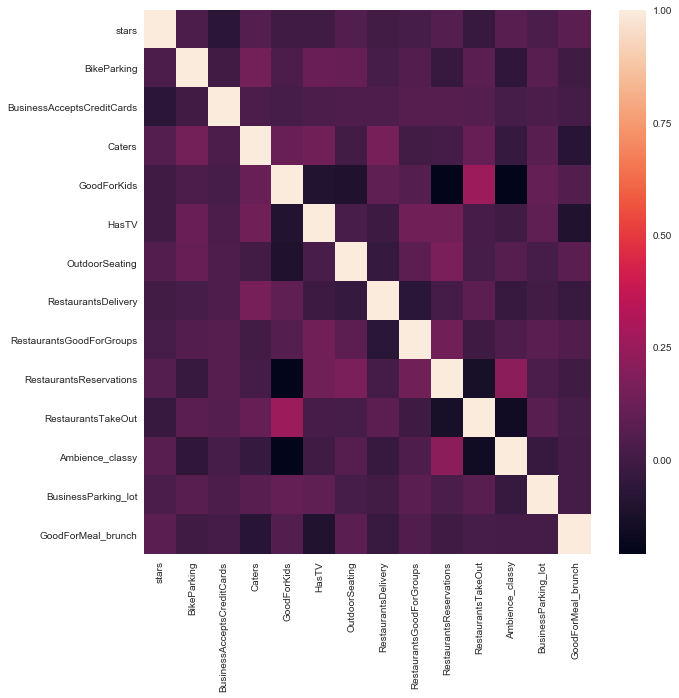

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = USA_restaurants_df1[['stars', 'BikeParking', 'BusinessAcceptsCreditCards', 'Caters', 'GoodForKids',
                               'HasTV','OutdoorSeating', 'RestaurantsDelivery', 'RestaurantsGoodForGroups',
                               'RestaurantsReservations', 'RestaurantsTakeOut', 'Ambience_classy', 
                               'BusinessParking_lot','GoodForMeal_brunch']]
plt.figure(figsize = (10,10))
sns.heatmap(correlation.corr());
#It's hard to show all the numerical business attributes in this correlation plot, so we chose as many as we could
#to see if they are correlated to each other

It is good that none of the variables are highly correlated.

### Restaurants Star Distribution Pie Chart

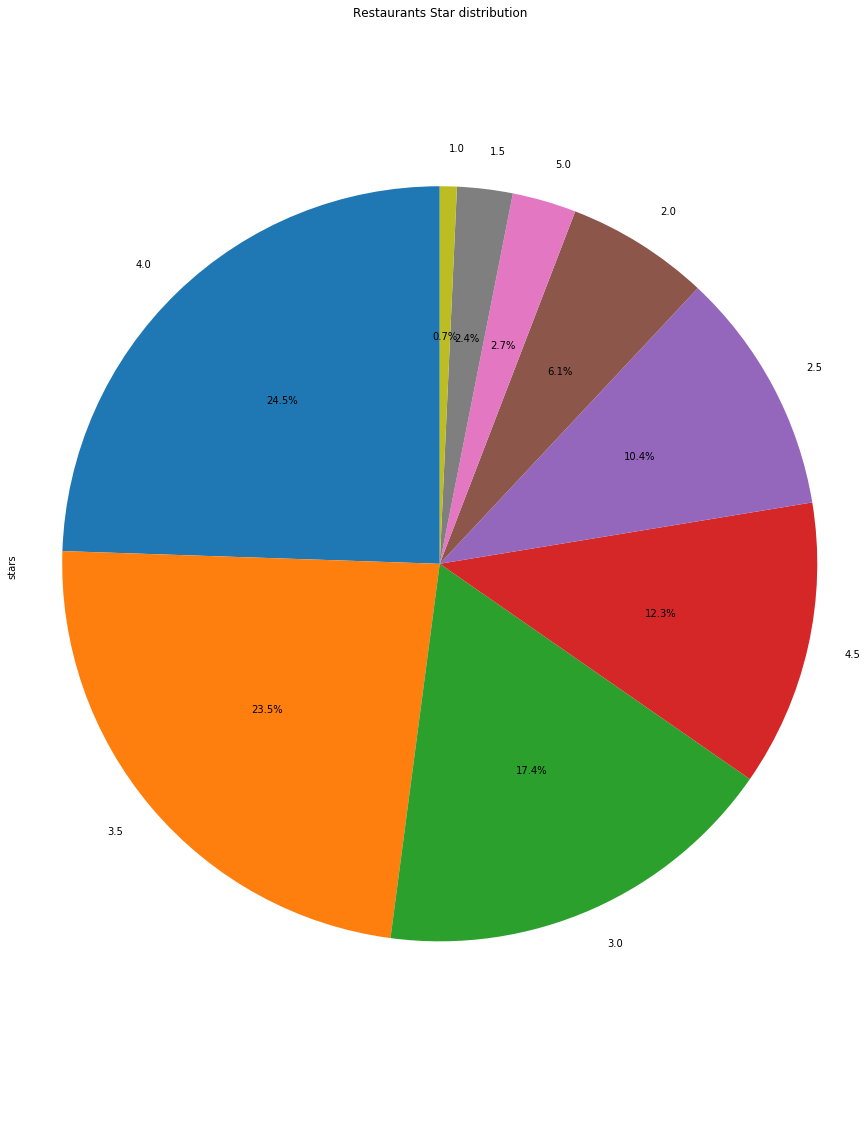

In [39]:
import matplotlib.pyplot as plt
stars = USA_restaurants["stars"].value_counts()


plt.figure(figsize = (15, 20))
plt.title("Restaurants Star distribution")
stars.plot.pie(y = stars.index,
           shadow = False,
           startangle = 90,
           autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

### Restaurants Star Distribution Bar Chart

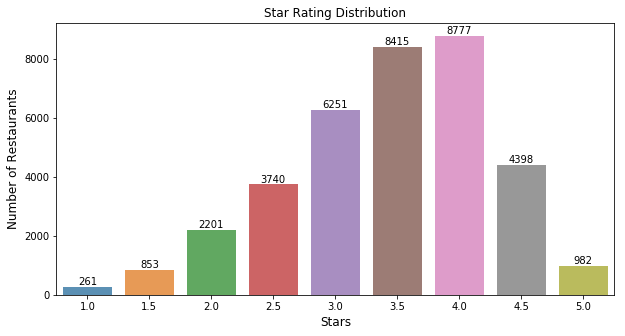

In [40]:
import seaborn as sns
x = USA_restaurants['stars'].value_counts()
x = x.sort_index()
plt.figure(figsize = (10,5))
ax = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("Star Rating Distribution")
plt.ylabel('Number of Restaurants', fontsize = 12)
plt.xlabel('Stars', fontsize = 12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
   height = rect.get_height()
   ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va ='bottom')
plt.show()

### Distribution of Restaurants By State

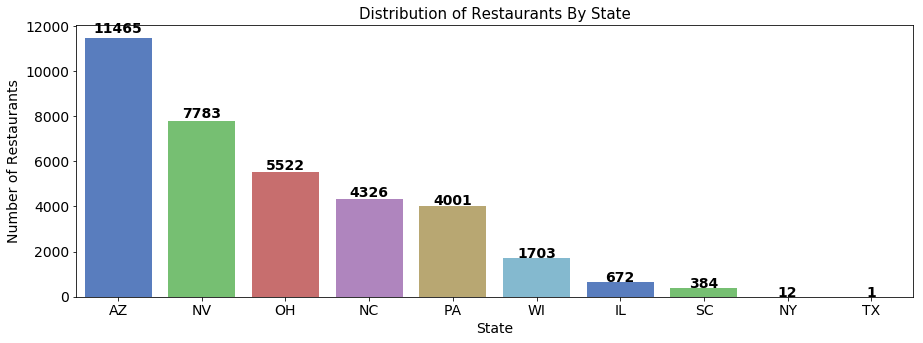

In [41]:
plt.figure(figsize = (15,5))
grouped = USA_restaurants.state.value_counts()[:10]
sns.barplot(grouped.index, grouped.values,palette = sns.color_palette("muted", len(grouped)) )
plt.ylabel('Number of Restaurants', fontsize = 14)
plt.xlabel('State', fontsize = 14)
plt.title('Distribution of Restaurants By State', fontsize = 15)
plt.tick_params(labelsize = 14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize = 14)

### Distribution of Stars For Each State

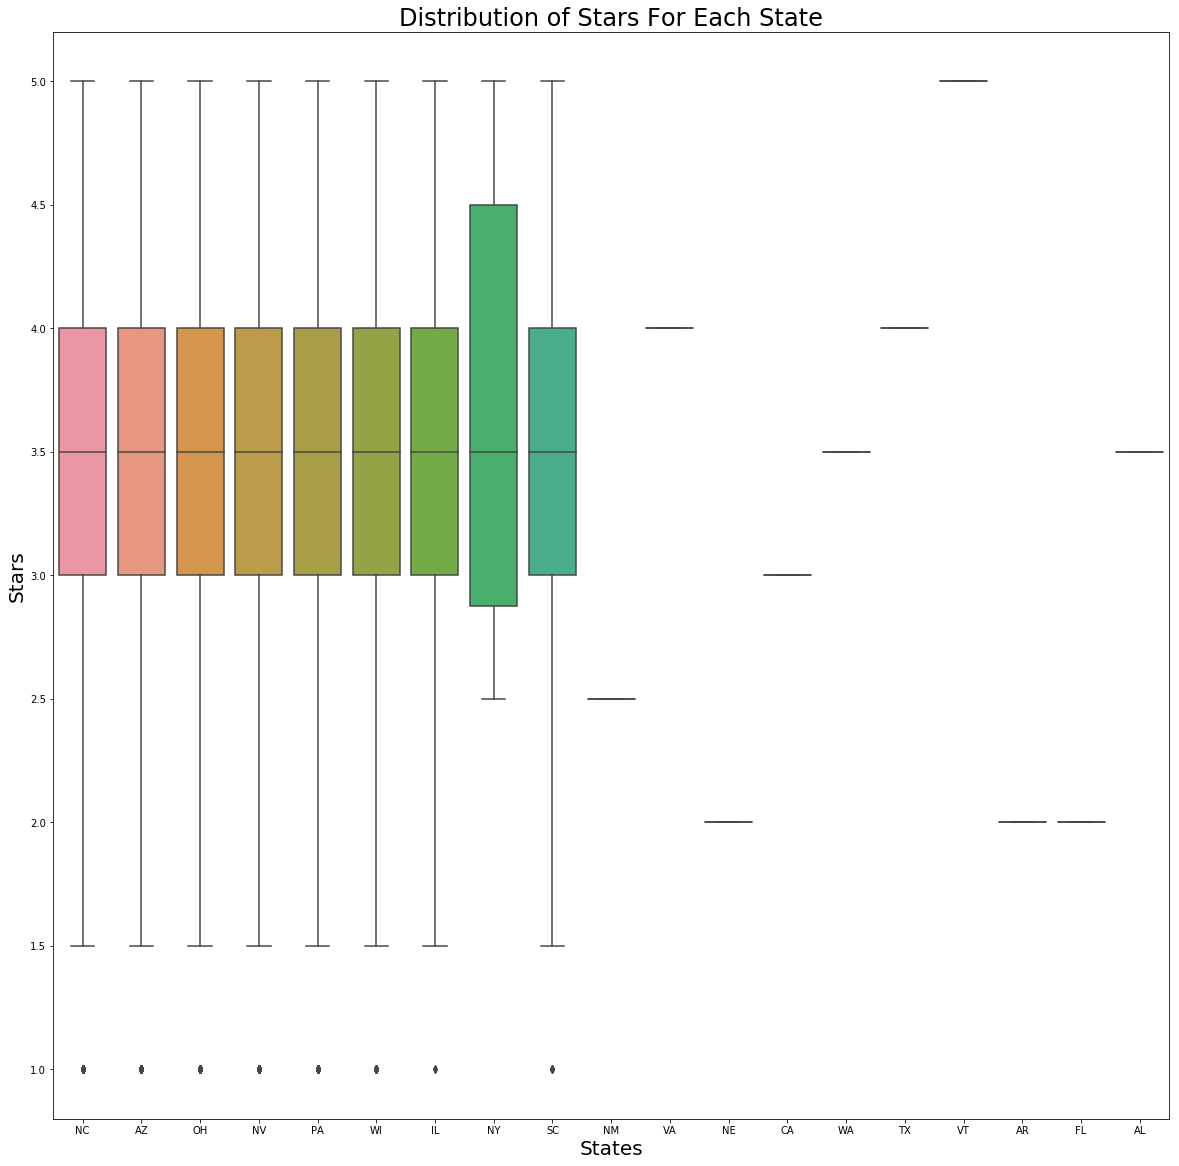

In [42]:
plt.figure(figsize = (20,20))
ax = sns.boxplot(x = USA_restaurants['state'], y = USA_restaurants['stars'])
plt.xlabel('States', fontsize = 20)
plt.ylabel('Stars', fontsize = 20)
plt.title('Distribution of Stars For Each State', fontsize = 24)
plt.show()

### Distribution of Restaurants By City

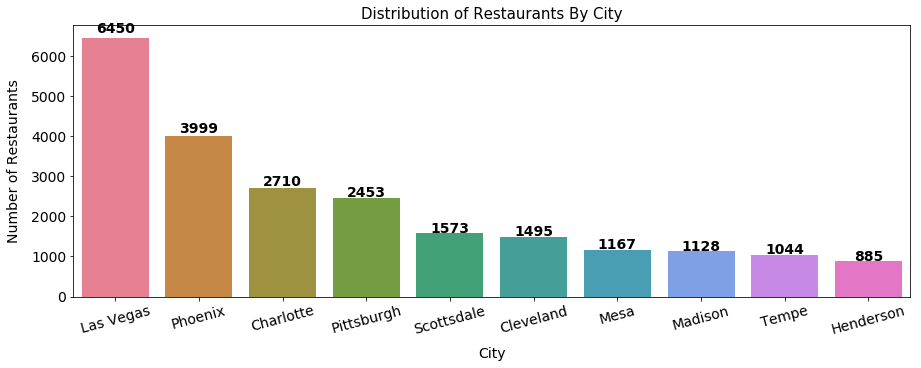

In [43]:
plt.figure(figsize = (15,5))
grouped = USA_restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette = sns.color_palette("husl", len(grouped)))
plt.ylabel('Number of Restaurants', fontsize = 14, labelpad = 10)
plt.xlabel('City', fontsize = 14, labelpad = 10)
plt.title('Distribution of Restaurants By City', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.xticks(rotation = 15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight ='bold', fontsize=14)

### Top 10 Restaurants with Most Reviews

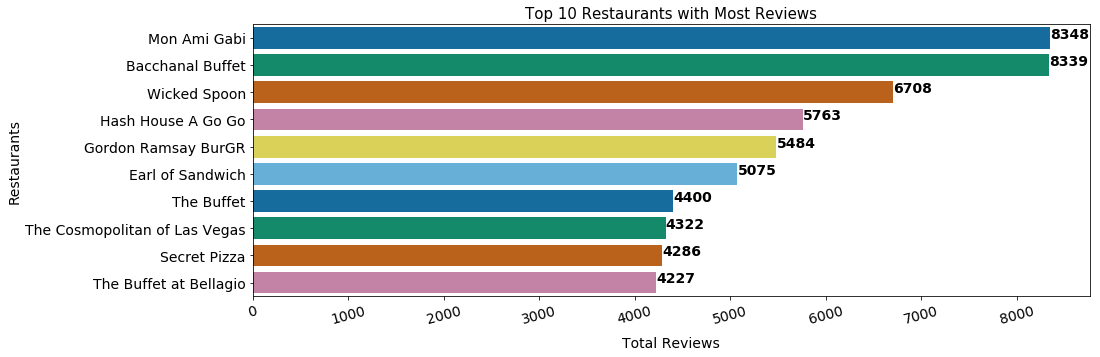

In [44]:
plt.figure(figsize = (15,5))
grouped = USA_restaurants[['name','review_count']].sort_values(by = 'review_count', ascending = False)[:10]
sns.barplot(x = grouped.review_count, y = grouped.name, palette = sns.color_palette("colorblind", len(grouped)), 
            ci = None)
plt.xlabel('Total Reviews', labelpad = 10, fontsize = 14)
plt.ylabel('Restaurants', fontsize = 14)
plt.title('Top 10 Restaurants with Most Reviews', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.xticks(rotation = 15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight = 'bold', fontsize = 14)

In [45]:
#Finding out where those top reviewed restaurants are located
#USA_restaurants[USA_restaurants["name"].isin(["Mon Ami Gabi", "Bacchanal Buffet", "Wicked Spoon","Hash House A Go Go",
        #"Gordon Ramsay BurGR", "Earl of Sandwich", "The Buffet", "The Cosmopolitan of Las Vegas",
        #"Secret Pizza", "The Buffet at Bellagio"])]

In [46]:
#Finding out where those top reviewed restaurants are located
USA_restaurants[USA_restaurants["business_id"].isin(["4JNXUYY8wbaaDmk3BPzlWw", "RESDUcs7fIiihp38-d6_6g", 
"K7lWdNUhCbcnEvI0NhGewg", "f4x1YBxkLrZg652xt2KR5g", "cYwJA2A6I12KNkm2rtXd5g", "DkYS3arLOhA8si5uUEmHOw",
"2weQS-RnoOBhb1KsHKyoSQ","5LNZ67Yw9RD6nf4_UhXOjw", "iCQpiavjjPzJ5_3gPD5Ebg", "ujHiaprwCQ5ewziu0Vi9rw"])]


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1975,3600 S Las Vegas Blvd,"{'RestaurantsAttire': ''casual'', 'Restaurants...",ujHiaprwCQ5ewziu0Vi9rw,"American (New), Buffets, Restaurants",Las Vegas,"{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",1,36.113220,-115.176890,The Buffet at Bellagio,89109,4227,3.5,NV
29614,"3708 Las Vegas Blvd S, Level 3, The Boulevard ...","{'RestaurantsPriceRange2': '1', 'BikeParking':...",iCQpiavjjPzJ5_3gPD5Ebg,"Pizza, Restaurants",Las Vegas,"{'Monday': '11:0-5:0', 'Tuesday': '11:0-4:0', ...",1,36.109837,-115.174212,Secret Pizza,89109,4286,4.0,NV
35199,3708 Las Vegas Blvd S,"{'GoodForKids': 'True', 'RestaurantsPriceRange...",K7lWdNUhCbcnEvI0NhGewg,"Buffets, Breakfast & Brunch, Restaurants",Las Vegas,"{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...",1,36.109550,-115.176155,Wicked Spoon,89109,6708,3.5,NV
58852,3535 Las Vegas Blvd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",f4x1YBxkLrZg652xt2KR5g,"Breakfast & Brunch, Food, Restaurants, America...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.118181,-115.171580,Hash House A Go Go,89109,5763,4.0,NV
82250,3655 Las Vegas Blvd S,"{'Corkage': 'True', 'RestaurantsDelivery': 'Fa...",4JNXUYY8wbaaDmk3BPzlWw,"Food, French, Breakfast & Brunch, Restaurants,...",Las Vegas,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,36.112859,-115.172434,Mon Ami Gabi,89109,8348,4.0,NV
83950,3667 Las Vegas Blvd S,"{'RestaurantsGoodForGroups': 'True', 'Business...",DkYS3arLOhA8si5uUEmHOw,"Food Delivery Services, Salad, Sandwiches, Sou...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.109418,-115.171874,Earl of Sandwich,89109,5075,4.5,NV
89206,3570 S Las Vegas Blvd,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...",RESDUcs7fIiihp38-d6_6g,"Restaurants, Buffets, Sandwiches, Food, Breakf...",Las Vegas,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...",1,36.116113,-115.176222,Bacchanal Buffet,89109,8339,4.0,NV
89437,3708 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '3', 'RestaurantsRe...",5LNZ67Yw9RD6nf4_UhXOjw,"Casinos, Hotels, Event Planning & Services, Re...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.109755,-115.173877,The Cosmopolitan of Las Vegas,89109,4322,4.0,NV
141820,3667 Las Vegas Blvd S,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...",cYwJA2A6I12KNkm2rtXd5g,"Restaurants, Burgers, American (Traditional)",Las Vegas,"{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",0,36.110724,-115.172169,Gordon Ramsay BurGR,89109,5484,4.0,NV
174616,3131 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '3', 'RestaurantsDe...",2weQS-RnoOBhb1KsHKyoSQ,"Beauty & Spas, Food, Event Planning & Services...",Las Vegas,"{'Monday': '7:30-21:30', 'Tuesday': '7:30-21:3...",1,36.126887,-115.165590,The Buffet,89109,4400,3.5,NV


#### Looks like all those top 10 most reviewed restaurants hail from Las Vegas, NV

# 4 Trying Various Models And Comparing The Scores ###

In [47]:
USA_restaurants_df1.head()

,stars,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
#Stars is our target variable. Let's get the value counts of stars
USA_restaurants_df1['stars'].value_counts()

0.0    21721
1.0    14157
Name: stars, dtype: int64

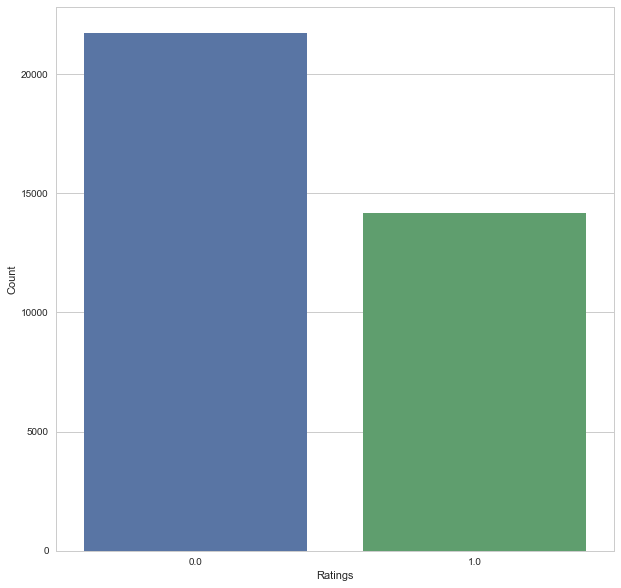

In [49]:
#Barplot of the stars Count
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid")
group = USA_restaurants_df1.groupby(['stars'])
gs = group.size()
fig, ax = plt.subplots(figsize = (10, 10))
ax.set(xlabel = 'Ratings', ylabel = 'Count')
sns.barplot(x = gs.index.tolist(), y = gs.values)
plt.show()

## Features and Target

In [50]:
#Getting our features and target
#Features
x = USA_restaurants_df1.drop("stars", axis = 1) 

#Target
y = USA_restaurants_df1["stars"]

In [51]:
x.head()

,BikeParking,BusinessAcceptsCreditCards,Caters,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsReservations,RestaurantsTakeOut,Ambience_casual,Ambience_classy,Ambience_divey,Ambience_hipster,Ambience_intimate,Ambience_romantic,Ambience_touristy,Ambience_trendy,Ambience_upscale,BusinessParking_garage,BusinessParking_lot,BusinessParking_street,BusinessParking_valet,BusinessParking_validated,GoodForMeal_breakfast,GoodForMeal_brunch,GoodForMeal_dessert,GoodForMeal_dinner,GoodForMeal_latenight,GoodForMeal_lunch,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,NoiseLevel_None,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_None,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4,RestaurantsPriceRange_None,WiFi_None,WiFi_free,WiFi_no,WiFi_paid
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
y.head()

2     1.0
11    0.0
13    1.0
17    1.0
23    1.0
Name: stars, dtype: float64

## Train Test Split 

In [53]:
#Dividing the data into training and testing (with test_size = 0.3 and random_state = 0)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

We need to split first before oversampling because our test data needs to be untouched

In [54]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((25114, 52), (25114,), (10764, 52), (10764,))

## Oversampling

In [55]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler

#RandomOverSampler (with random_state=0) 
ros = RandomOverSampler(random_state = 0) #declare random sampler
X_train_over, Y_train_over = ros.fit_sample(X_train, Y_train) #use that random sampler 

Oversampling is performed on our training data

In [56]:
X_train_over.shape, Y_train_over.shape

((30408, 52), (30408,))

## 4.1 Decision Tree

In [57]:
#Decision Tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
pipe_dt = Pipeline([('StandardScaler', StandardScaler()), ('DecisionTreeClassifier', DecisionTreeClassifier())])
pipe_dt.fit(X_train_over, Y_train_over)
acc_dt = round(pipe_dt.score(X_test, Y_test)*100, 2)
print("Decision Tree is %2.2f" %acc_dt)
#DecisionTree as dt


Decision Tree is 59.00


## 4.2 Random Forest 

In [58]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])
pipe_rf.fit(X_train_over, Y_train_over)
acc_rf = round(pipe_rf.score(X_test, Y_test)*100, 2)
print("Random Forest Classifier is %2.2f" %acc_rf)
#RandomForestClassifier as rf

Random Forest Classifier is 60.11


## 4.3 KNeighbors 

In [59]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
pipe_knn = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', KNeighborsClassifier())])
pipe_knn.fit(X_train_over, Y_train_over)
acc_knn = round(pipe_knn.score(X_test, Y_test)*100, 2)
print("KNeighbours Classifier is %2.2f" %acc_knn)
#KNeighbors Classifier as knn 

KNeighbours Classifier is 61.15


## 4.4 Gaussian Naive Bayes

In [60]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
pipe_gaussian = Pipeline([('StandardScaler', StandardScaler()), ('GaussianNB', GaussianNB())])
pipe_gaussian.fit(X_train_over, Y_train_over)
acc_gaussian = round(pipe_gaussian.score(X_test, Y_test)*100, 2)
print("Gausssian Naive Bayes %2.2f" %acc_gaussian)
##Gaussian Naive Bayes as gaussian

Gausssian Naive Bayes 43.30


## 4.5 Logistic Regression

In [61]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
pipe_lr = Pipeline([('StandardScaler', StandardScaler()), ('LogisticRegression', LogisticRegression())])
pipe_lr.fit(X_train_over, Y_train_over)
acc_lr = round(pipe_lr.score(X_test, Y_test)*100, 2)
print("Logistic Regression is %2.2f" %acc_lr)
#Logistic Regression as lr

Logistic Regression is 61.54


## 4.6 Model Comparison

In [62]:
#Model Comparasion
models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 
              'Logistic Regression','Naive Bayes'],
    'Score': [acc_rf,acc_dt, 
              acc_knn, acc_lr, 
              acc_gaussian]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Logistic Regression,61.54
2,KNN,61.15
0,Random Forest,60.11
1,Decision Tree,59.00
4,Naive Bayes,43.30


### 4.1.1 The parameter grid for decision tree
The hyperparameters we want to fine tune are:

- min_samples_split

- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn decision tree documentation



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clfs = {'lr': LogisticRegression(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB()}

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [65]:
param_grids = {}

In [66]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]
param_grids['dt'] = param_grid

### 4.2.1 The parameter grid for random forest
The hyperparameters we want to fine tune are:

- n_estimators

- min_samples_split

- min_samples_leaf

See details of the meaning of the hyperparametes in sklearn random forest documentation

In [67]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

### 4.3.1 The parameter grid for KNN
The hyperparameters we want to fine tune are:

- n_neighbors

See details of the meaning of the hyperparametes in sklearn KNN documentation

In [68]:
param_grid = [{'clf__n_neighbors': list(range(1, 11))}]

param_grids['knn'] = param_grid

### 4.4.1 The parameter grid for GNB
The hyperparameters we want to fine tune are:

- var_smoothing

See details of the meaning of the hyperparametes in sklearn GNB documentation

In [69]:
param_grid = [{'clf__var_smoothing': [10 ** i for i in range(-10, -7)]}]

param_grids['gnb'] = param_grid


### 4.5.1 The parameter grid for logistic regression
The hyperparameters we want to fine tune are:

- multi_class

- solver

- C

Here we need to use two dictionaries in the parameter grid since 'multinomial' (multi_class) 
does not support 'liblinear' (solver). 

See details of the meaning of the hyperparametes in sklearn logistic regression documentation

In [70]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid


# 5 Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from time import time

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []


# For each classifier
for name in pipe_clfs.keys():
    start = time()
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    #print(X_train_over.shape[0], Y_train_over.shape[0])
    gs = gs.fit(X_train_over, Y_train_over)
    
    print(name, time() - start)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    

lr 571.4971039295197
dt 13.322877883911133
rf 75.71740174293518
knn 3007.8966960906982
gnb 2.260986328125


# 6 Model Selection

In [72]:
#Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

#For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], 
           type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.6803143909497501, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 30}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.662917653249145, {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]

[0.6427255985267035, {'clf__n_neighbors': 1}, <class 'sklearn.neighbors.classification.KNeighborsClassifier'>]

[0.6183241252302025, {'clf__C': 0.001, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.5320639305445936, {'clf__var_smoothing': 1e-08}, <class 'sklearn.naive_bayes.GaussianNB'>]



Better results after hyperparameter tuning

## 6.1 Modeling Random Forest

Mean Accuracy:
0.605072463768116
Confusion Matrix:
[[4188 2329]
 [1922 2325]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66      6517
         1.0       0.50      0.55      0.52      4247

   micro avg       0.61      0.61      0.61     10764
   macro avg       0.59      0.60      0.59     10764
weighted avg       0.61      0.61      0.61     10764



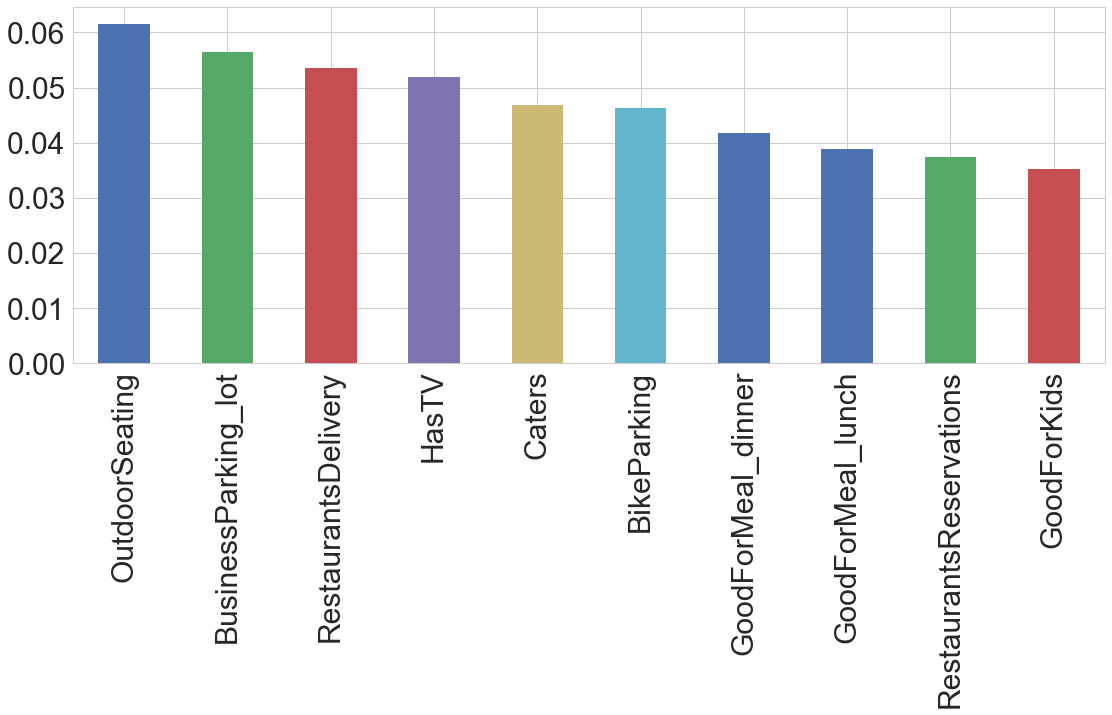

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=100)
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())])
pipe_rf.fit(X_train_over, Y_train_over)

#Performance Check
print("Mean Accuracy:")
print(pipe_rf.score(X_test, Y_test))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, pipe_rf.predict(X_test)))

print("Classification Report:")
print(classification_report(Y_test, pipe_rf.predict(X_test)))

#Plotting feature importance
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, x.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False).nlargest(10)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## 6.2 Modeling Decision Tree

In [74]:
!pip install pydotplus
!pip install Graphviz
!pip install Image

In [75]:
fake_dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#pipe_dt.named_steps['DecisionTreeClassifier']
fake_dt.fit(X_train_over, Y_train_over)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

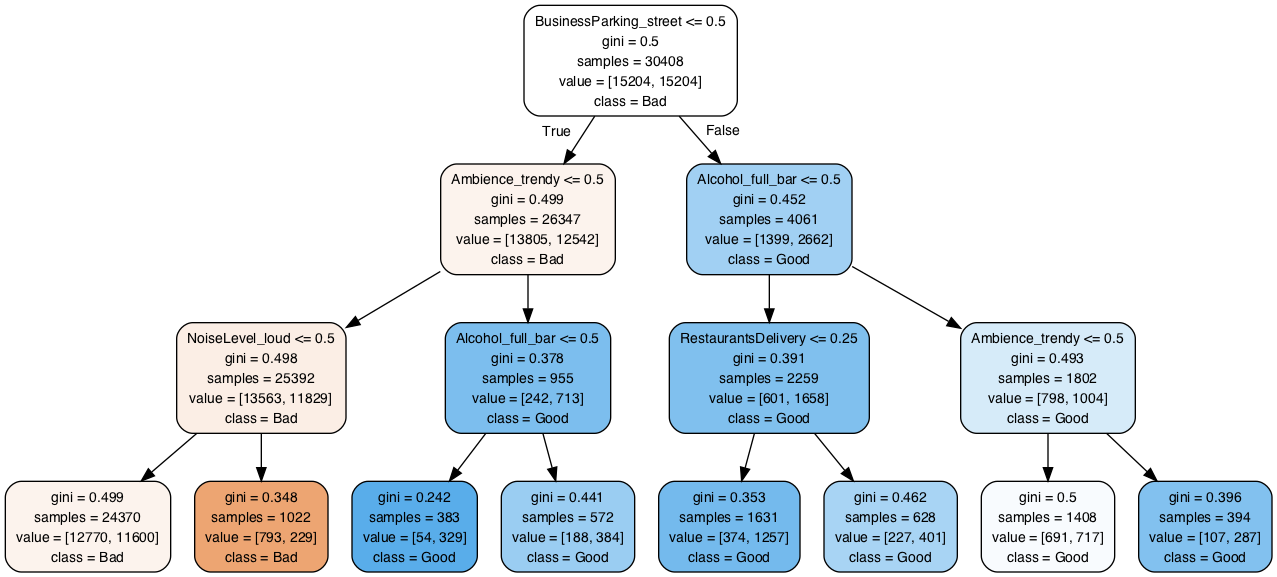

In [76]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(fake_dt,
                           filled=True, 
                           rounded=True,
                           class_names=['Bad', 
                                        'Good'],
                           feature_names=x.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png())

In [77]:
vars(pipe_dt.named_steps['DecisionTreeClassifier'])

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'random_state': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': False,
 'n_features_': 52,
 'n_outputs_': 1,
 'classes_': array([0., 1.]),
 'n_classes_': 2,
 'max_features_': 52,
 'tree_': <sklearn.tree._tree.Tree at 0x1a55d65d30>}

In [78]:
pipe_dt.named_steps['DecisionTreeClassifier'].tree_.node_count

14143